# Clase 5: Aprendizaje no supervisado

A diferencia del aprendizaje supervisado, en el *análisis no supervisado* los datos no tienen etiqueta, y solo contamos con sus características $x_i$. 
Todos lucen igual y el objetivo es encontrar estructuras subyacentes en los datos: patrones, grupos, redundancias...:

<center>
<img src='im/NoSupervisado.PNG'> 
<img src='im/NoSupervisadoClas.PNG'>
</center>

Intentaremos dar respuesta a las siguientes preguntas:
- ¿Hay alguna manera informativa de visualizar los datos?
- ¿Existen subgrupos interesantes dentro de la muestra observada?
- ¿Hay datos atípicos o anomalías?

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ecommerce_data = pd.read_csv('ecommerce-customers.csv') # Cargamos los datos al espacio de trabajo

In [3]:
ecommerce_data.sample(5) # Exploramos los datos

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Membership Category
363,tammy12@gmail.com,"78297 Brown Street Apt. 786\nEast Taylorfurt, ...",Chocolate,34.179518,12.581548,35.444265,3.137069,527.782996,Premium
121,ngarcia@donaldson.info,662 Wells Stravenue Apt. 578\nSouth Kristaview...,ForestGreen,33.701605,11.564022,37.673210,4.716105,576.802547,Gold
61,floresarthur@yahoo.com,"12612 Johnson Skyway Suite 764\nJessicaville, ...",Magenta,33.076536,9.607315,36.493993,5.081210,507.212569,Gold
27,heatherhall@yahoo.com,"8522 Regina Port Suite 782\nPort Kaitlin, TX 5...",MediumSlateBlue,32.335990,13.007819,37.851779,2.996365,486.838935,Premium
244,taylorkimberly@yahoo.com,"0030 Mathis Square Suite 154\nSouth Jadehaven,...",Gainsboro,31.283447,12.725677,35.965667,5.000243,591.781089,Gold


In [5]:
ecommerce_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Membership Category'],
      dtype='object')

#### ¿Qué tipos de datos es cada una de las variables?

In [9]:
columnas = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent'] # Creamos una lista con las columnas que vamos a usar para los análisis

In [7]:
ecommerce_data['Membership Category'] = ecommerce_data['Membership Category'].astype('category') # Convertimos la variable a tipo categórico 

In [34]:
import seaborn as sns # Libraría interesante para hacer visualizaciones

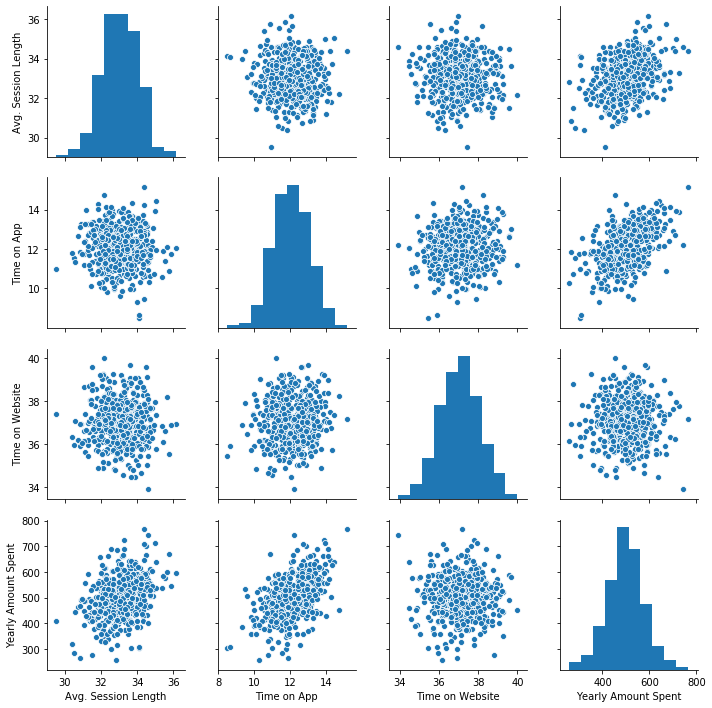

In [35]:
sns.pairplot(ecommerce_data.loc[:, columnas]); # Graficos de dispersión para comparar las variables 2-a-2, e histogramas para cada variable

## Reducción de dimensionalidad: Análisis de Componentes Principales (PCA)

- Queremos resumir la información según las direcciones de las características en las que más varían las observaciones.

- Un _Componente Principal_ $Z$ es una combinación lineal de las características de la muestra:

$$Z = \varphi_1 X_1 + \varphi_2 X_2 + ... + \varphi_k X_k.$$

Para obtener el _j_-ésimo componente principal $Z_j$ se procede de la siguiente manera manera:

$$Z_j = \varphi_{1,j} X_1 + \varphi_{2,j} X_2 + ... + \varphi_{k,j} X_k$$

$$\max_{\vec \varphi_j} \left\{ Var(Z_j) \right\} = \max_{\vec \varphi_j} \left\{ \frac{1}{N}\sum_{i=1}^{N}(\varphi_{1,j} x_{i,1} + \varphi_{2,j} x_{i,2} + ... + \varphi_{k,j} x_{k,N})^2 \right\},$$

con las restricciones 
$$\sum_{i=1}^{k}\varphi_{i,j}^2 = 1, ~~~~~ \vec\varphi_j \perp Z_1, ~\vec\varphi_j \perp Z_2, ..., ~\vec\varphi_j \perp Z_{j-1}.$$


In [10]:
from sklearn.preprocessing import StandardScaler # Función para escalar las variables (pasan a tener media 0 y varianza 1)

In [11]:
scaled_data = ecommerce_data.loc[:, columnas]
scaled_data = StandardScaler().fit_transform(scaled_data) # Escalamos las variables

In [12]:
from sklearn.decomposition import PCA # Función para hacer Principal Component Analysis

In [13]:
pca = PCA(n_components=4) # Creamos el objeto de tipo PCA diciendo cuántos componentes deseamos encontrar

In [14]:
principalComponents = pca.fit_transform(scaled_data) # Se calculan los componentes principales para los datos 

In [15]:
projected_data = pd.DataFrame(principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4']) # Convertimos los resultados en un pandas.DataFrame

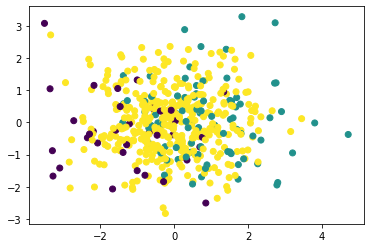

In [16]:
# Graficamos los datos según sus dos primeros componentes princiaples, junto con su categoría de membresía. ¿Se observa alguna relación?
plt.scatter(projected_data['pc1'], projected_data['pc2'], c = ecommerce_data['Membership Category'].cat.codes); 

In [17]:
columnas

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Yearly Amount Spent']

In [18]:
# Extraemos los pesos con los que se ponderan las variables para generar los componentes principales (vectores de carga, phi)
pca.components_ 

array([[ 0.39054956,  0.58064458,  0.05368841,  0.71234855],
       [ 0.62596276, -0.43736267, -0.6427062 ,  0.0617516 ],
       [-0.53086821,  0.36719234, -0.76218683,  0.0491932 ],
       [ 0.41691799,  0.58028919, -0.05583496, -0.697371  ]])

Los componentes principales maximizan la varianza observada de los datos y, además, generan el hiperplano más cercano a las observaciones

<center>
<img src='im/PCAajuste.PNG'> 
</center>

Esto motiva a usarlos tambien como variables predictoras en modelos de aprendizaje supervisado.

### ¿Cuántos componentes usamos?

In [19]:
# Extraemos la varianza explicada por cada componente, y la varianza acumulada
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.40037223 0.27259863 0.23402758 0.09300155]
[0.40037223 0.67297086 0.90699845 1.        ]


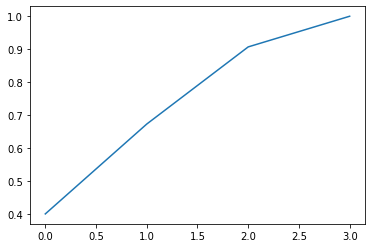

In [20]:
plt.plot(range(4), pca.explained_variance_ratio_.cumsum()); # Graficamos la varianza acumulada

Buscamos un codo en la gráfica: cuando la ganancia en varianza explicada no compense el usar un componente adicional (más dimensionalidad).

### ¿Qué ocurre si no normalizamos las variables?

In [21]:
# Repetimos el ejercicio sin escalar los datos
pca_noscale = PCA(n_components=4)

In [22]:
principalComponents_noscale = pca_noscale.fit_transform(ecommerce_data.loc[:, columnas])

In [23]:
pca_noscale.explained_variance_ratio_

array([9.99583080e-01, 1.74288903e-04, 1.49641131e-04, 9.29895528e-05])

In [24]:
projected_data_noscale = pd.DataFrame(principalComponents_noscale, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

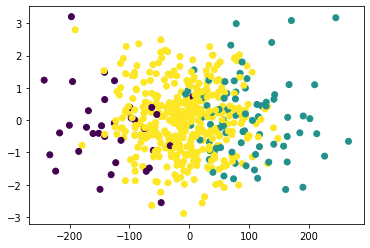

In [25]:
plt.scatter(projected_data_noscale['pc1'], projected_data_noscale['pc2'], c = ecommerce_data['Membership Category'].cat.codes);

In [26]:
columnas

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Yearly Amount Spent']

In [27]:
pca_noscale.components_

array([[ 4.44393121e-03,  6.25951436e-03, -3.35898913e-05,
         9.99970534e-01],
       [ 5.00154383e-01, -4.59188418e-01, -7.34160198e-01,
         6.27002939e-04],
       [-6.43595470e-01,  3.70095308e-01, -6.69935865e-01,
         5.20989379e-04],
       [-5.79319183e-01, -8.07549551e-01,  1.10429793e-01,
         7.63325686e-03]])

La diferencia en la escala genera que la variable de _gasto_ recoja el 99 % de la varianza y por tanto sea el primer componente principal exclusivamente.

#### Existen otros algoritmos de reducción de dimensionalidad:

- MCA.
- tSNE.

# Análisis de clustering: $k$-medias

Queremos divdir la base de datos en diferentes grupos tales que las observaciones en un mismo grupo sean _similares_ entre sí, y observaciones en grupos distintos sean _diferentes_ entre ellas.

**¿Cómo definimos dos datos como similares o diferentes?**


- El método de agrupamiento de $k$-medias busca dividir el conjunto de datos en $k$ grupos diferentes que no se sobrelapan.
- Cada una de las observaciones $x_i$ pertenece a uno, y solo uno, de los clusters $C_k$.
- Para cada grupo, se calcula su varianza interna (_within cluster variation_):

$$Var(C_k) = \sum_{j=1}^n Var(X_j^k) = \sum_{j=1}^n\left(\sum_{x_i\in C_k}(x_{i,j}-\bar X_j^k)^2\right).$$

- Queremos que la sumas de esta varianzas de los grupos sea lo más pequeña posible, en otras palabras, que los datos dentro de cada cluster sean lo más parecidos. 

In [28]:
from sklearn.cluster import KMeans # Función 

In [29]:
clusters = KMeans(n_clusters=3)   # Objeto de tipo K-medios con k=3

In [30]:
clusters = clusters.fit(scaled_data) # Ajustamos (fit) el modelo a los datos escalados

In [31]:
projected_data['cluster'] = clusters.predict(scaled_data) # Predecimos a qué grupo pertenece cada observacion

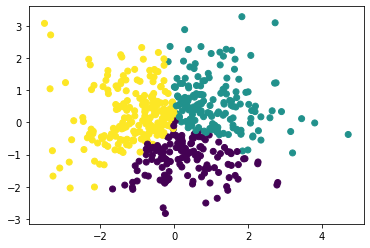

In [32]:
plt.scatter(projected_data['pc1'], projected_data['pc2'], c = projected_data['cluster']); # Graficamos los resultados, usando PCA

### Los centroides de cada grupo nos permiten entender qué tipo de observaciones hay un cada uno de ellos.

In [33]:
columnas

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Yearly Amount Spent']

In [34]:
# Extraemos los centroides de los grupos y manualmente se analizan buscando interpretarlos
clusters.cluster_centers_

array([[-0.65157571,  0.74833347,  0.67965075,  0.14825748],
       [ 0.83636252,  0.35708478, -0.31404184,  0.83229143],
       [-0.24346824, -0.77320182, -0.19218005, -0.76167524]])

### ¿Cuántos grupos se deben escoger?

- Información propia del problema.
- Nuevamente usamos la regla del codo: cuando la ganancia en menor varianza de los grupos no compense tener un grupo adicional.

In [32]:
varianzas = [] # Creamos la lista para guardar los resultados

for k in range(1,21):
    clust = KMeans(n_clusters=k)   # Objeto de tipo K-medios con k grupos de acuerdo con el loop que estamos haciendo
    clust.fit(scaled_data)
    varianzas.append(clust.inertia_) # Clust.intertia_ indica la suma de las varianzas internas de los grupos, justamente lo que se desea minimizar con el algoritmo

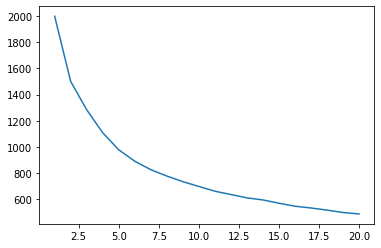

In [33]:
plt.plot(range(1,21), varianzas); # Graficamos el resultado variando el número de clusters, buscando un codo en la gráfica

In [34]:
# Generamos el número de grupos escogido
clusters = KMeans(n_clusters=5)
clusters = clusters.fit(scaled_data) 
projected_data['cluster'] = clusters.predict(scaled_data)

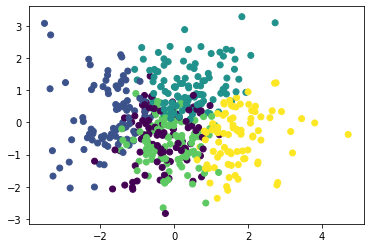

In [35]:
plt.scatter(projected_data['pc1'], projected_data['pc2'], c = projected_data['cluster']);

# Clústering Jerárquico

La idea de esta metodología es representar cómo se van formando los diferentes clusters en forma de _árbol_ (**dendrograma**): Cada observación se representa como una _hoja_ y se van fusionando en _ramas_ hasta llegar a la _raíz_ del árbol.

<center>
<img src='im/squaredat.PNG'> 
<img src='im/dend.PNG'>
</center>

- Entre más rápido ocurra una fusión (más abajo en el árbol) más parecidas serán los grupos de observaciones.
- La altura del corte en el dendrograma determina entonces la cantidad de grupos en los que se dividen los datos

En general se define la similaridad entre dos puntos de acuerdo con la distancia euclideana, pero ¿cómo extendemos esto a grupos con múltiples observaciones, _A y B_?

Esto es la decisión central en esta metodología. Los más usados son:  
- _Enlace Ward_: Similaridad entre grupos como la **varianza**. La distancia entre los grupos es la suma de sus distancias euclideana y permite minimizar la varianza total interna del nuevo  clúster creado.
- _Enlace Completo_: Similaridad entre grupos **máximal**. Se calculan todas las distancias entre elementos del cluster _A y B_ y se toma la más grande de estas como distancia entre los grupos.
- _Enlace Simple_: Similaridad entre grupos **minimal**. Se calculan todas las distancias entre elementos del cluster _A y B_ y se toma la menor de estas como distancia entre los grupos.
- _Enlace Promedio_: Similaridad **promedio** entre los grupos. Se calculan todas las distancias entre elementos del cluster _A y B_ y se toma el promedio de tales distancias. 
- _Enlace Centroide_: Similaridad entre los **centroides** de los grupos. Se calculan los centroides de los clusters como la media de sus observaciones, y se computa la distancia entre los dos centroides.

In [16]:
from sklearn.cluster import AgglomerativeClustering # Función para generar el clústering jerárquico
import scipy.cluster.hierarchy as sch # Función para generar dendrogramas

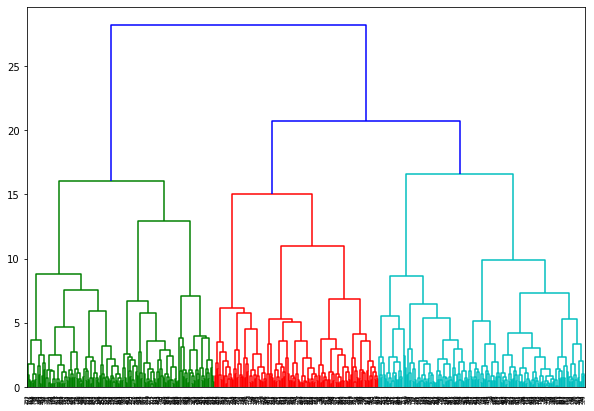

In [27]:
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward')) # Graficamos el dendrograma usando los enlaces tipo Ward

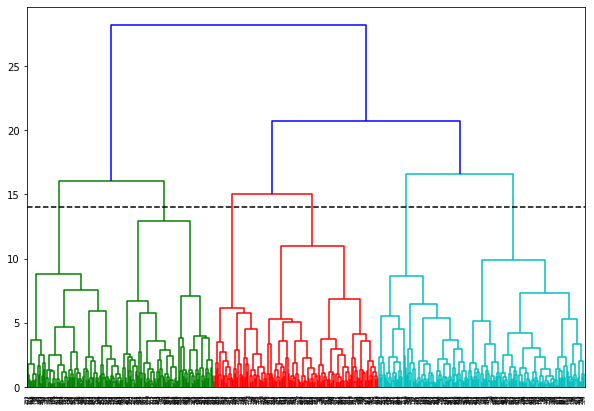

In [31]:
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.axhline(14, color = 'black', linestyle = '--'); # Escogemos una línea de corte la cual determina el número de grupos escogidos

In [23]:
hclusters = AgglomerativeClustering(n_clusters=6)  # Creamos el objeto de clustering con el número de grupos deseados
projected_data['hgrupo'] = hclusters.fit_predict(scaled_data) # Generamos los grupos en los datos

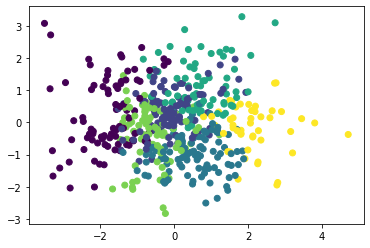

In [24]:
plt.scatter(projected_data['pc1'], projected_data['pc2'], c = projected_data['hgrupo']); # Graficamos los resultados

### Existen muchos otros algoritmos de agrupamiento:

- $k$-prototipos.
- Clústering jerárquico con diferentes métricas de similaridad.

# Detección de anomalías: Mixturas gaussianas

La idea es construir un _Modelo_ que permita estimar $p(x)$: la probabilidad de observar las características de cada uno de los datos. 

Con este modelo, si la probabilidad de observar $x_{test}$ es menor que cierto umbral de _rareza_: $p(x_{test}) < \varepsilon$, se cataloga $x_{test}$ como una observación _anómala_. Por el contrario, si $p(x_{test}) \geq \varepsilon$, $x_{test}$ supera el umbral de _rareza_ y se cataloga como una observación normal.

El Modelo de $p(x)$ debería indicar que observaciónes en el centro ocurren con mucha frecuencia,observaciones más alejadas ocurrirán frecuentemente, observaciones aún más alejadas ocurriren con relativa frecuencia, pero observaciones muy alejadas ocurrirán rara vez:

<center>
<img src='im/model_anom.PNG'> 
</center>

Una forma natural es suponer que las distintas variables se distribuyen de manera Normal:

$$p(x_i) = \prod_{j=1}^k \frac{1}{\sqrt{2\pi}\sigma_j}*\exp(-\frac{(x_{i,j}-\mu_j)}{2\sigma_j^2}),$$

con 

$$\mu_j = \frac{1}{N}\sum_{i=1}^N x_{i,j}, ~~~~ \sigma^2_j = \frac{1}{N} \sum_{i=1}^N (x_{i,j}-\mu_j)^2.$$


In [36]:
test_data = ecommerce_data.loc[:, ['Time on Website', 'Yearly Amount Spent']] # Extraemos las variables a utilizar

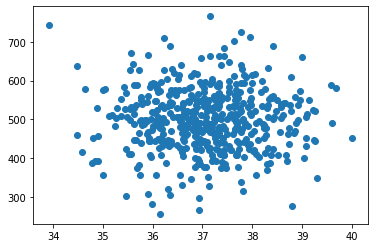

In [37]:
plt.scatter(test_data['Time on Website'], test_data['Yearly Amount Spent']); # Exploramos la distribución de las variables. Intuitivamente, ¿qué se podría considerar una anomalía en estos datos?

In [38]:
# Cálculo de la probabilidad usando mixturas gaussianas manualmente.
test_data['prob'] = ((1/((2*np.pi)**(1/2)*test_data['Time on Website'].std()))*np.exp(-(test_data['Time on Website']-test_data['Time on Website'].mean())**2/(2*test_data['Time on Website'].var()))*
                     (1/((2*np.pi)**(1/2)*test_data['Yearly Amount Spent'].std()))*np.exp(-(test_data['Yearly Amount Spent']-test_data['Yearly Amount Spent'].mean())**2/(2*test_data['Yearly Amount Spent'].var())))

In [39]:
test_data.sample(5) # Exploramos la variable creada

,Time on Website,Yearly Amount Spent,prob
126,36.634652,516.831557,0.001773
169,37.633009,501.749233,0.001690
36,36.765722,347.776927,0.000307
145,36.518384,505.771140,0.001714
15,36.213763,461.780742,0.001250


In [40]:
umbral_rareza = 0.00005
test_data['anomalia'] = test_data['prob'] < umbral_rareza # Creamos la variable dicótoma que indica si una observación se considera anómala

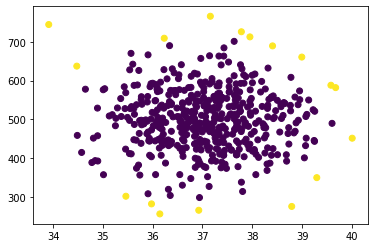

In [41]:
plt.scatter(test_data['Time on Website'], test_data['Yearly Amount Spent'], c = test_data['anomalia']); # Visualizamos los resultados

### Ahora usando _sklearn_

In [36]:
from sklearn.mixture import GaussianMixture # Función para generar el modelo de mixturas gaussianas

In [63]:
gmm = GaussianMixture(covariance_type='full') # Objeto de tipo Mixtura Gaussiana usando matriz de varianza-covarianza

In [69]:
test_data2 = ecommerce_data.loc[:, ['Time on Website', 'Yearly Amount Spent']]

In [70]:
gmm = gmm.fit(test_data2) # Ajustamos los datos al modelo

In [71]:
test_data2['prob'] = np.exp(gmm.score_samples(test_data2)) # Predecimos la probabilidad de cada observación. 
# Esta función retorna la log-verosimilitud por lo que toca evaluar los resultados en una exponencial

In [72]:
test_data2['prob'].describe()

count    5.000000e+02
mean     1.014119e-03
std      5.814404e-04
min      1.335006e-07
25%      5.401690e-04
50%      1.020327e-03
75%      1.532941e-03
max      1.983574e-03
Name: prob, dtype: float64

In [75]:
umbral_rareza = 0.00005
test_data2['anomalia'] = test_data2['prob'] < umbral_rareza # Creamos la variable dicótoma que indica si una observación se considera anómala

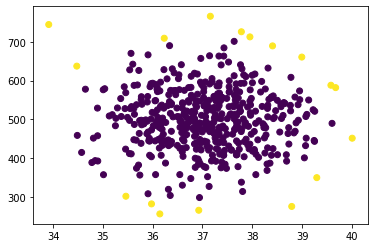

In [76]:
plt.scatter(test_data2['Time on Website'], test_data2['Yearly Amount Spent'], c = test_data2['anomalia']); # Visualizamos los resultados

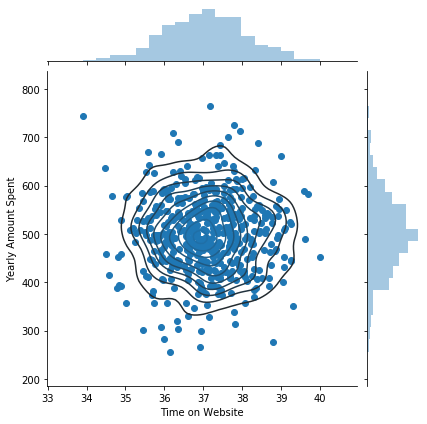

In [61]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = test_data2).plot_joint(sns.kdeplot); # Otra gráfica interesante generada con seaborn, justamente a partir de mixturas gaussianas

#### Se puden eliminar algunos supuestos:

- Otras distribuciones de probabilidad.
- No independencia de las variables.

#### O usar otras metodologías:

- Isolation Forest.
- One Class SVM.